In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjobs as mr


ImportError: No module named mrjobs

### Homework 5


## Homework 5.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



In [7]:
%%writefile code\orderedbigram.py
import mrjob
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
from itertools import islice, izip
import itertools
import heapq

WORD_RE = re.compile(r'[a-zA-Z]+')
TOPN = 10
class BigramCount(MRJob):
    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_words,
                   combiner=self.combiner_count_words,
                   reducer=self.reducer_count_words),
            MRStep(mapper=self.topN_mapper,
                   reducer=self.topN_reducer)
        ]
    
    def mapper_get_words(self, _, line):
        words = WORD_RE.findall(line)
        for i in izip(words, islice(words, 1, None)):
            bigram =str(i[0]+" " +i[1])
            yield bigram, 1
    def combiner_count_words(self, bigram, counts):
        yield bigram, sum(counts)
    def reducer_count_words(self, bigram, counts):
        yield bigram,sum(counts)
    def topN_mapper(self, bigram, counts):
        yield "Top " + str(TOPN), (counts, bigram)
    def topN_reducer(self, _, countsAndBigrams):
        for countAndbigram in heapq.nlargest(TOPN, countsAndBigrams):
            yield _, countAndbigram
        



if __name__ == '__main__':
    BigramCount.run()
    
    

Writing code\orderedbigram.py


In [8]:
%run code/orderedbigram.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Creating temp directory c:\users\akhila~1\appdata\local\temp\orderedbigram.Akhila Sharon.20181005.171322.996000
Creating temp directory c:\users\akhila~1\appdata\local\temp\orderedbigram.Akhila Sharon.20181005.171322.996000
Creating temp directory c:\users\akhila~1\appdata\local\temp\orderedbigram.Akhila Sharon.20181005.171322.996000
Running step 2 of 2...
Running step 2 of 2...
Running step 2 of 2...
job output is in c:\users\akhila~1\appdata\local\temp\orderedbigram.Akhila Sharon.20181005.171322.996000\output
job output is in c:\users\akhila~1\appdata\local\temp\orderedbigram.Akhila Sharon.20181005.171322.996000\output
job output is in c:\users\

"Top 10"	[13037, "of the"]
"Top 10"	[7145, "the lord"]
"Top 10"	[7035, "and the"]
"Top 10"	[6738, "in the"]
"Top 10"	[3799, "to the"]
"Top 10"	[3471, "i will"]
"Top 10"	[3038, "and he"]
"Top 10"	[3013, "shall be"]
"Top 10"	[2714, "all the"]
"Top 10"	[2672, "i have"]


Removing temp directory c:\users\akhila~1\appdata\local\temp\orderedbigram.Akhila Sharon.20181005.171322.996000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\orderedbigram.Akhila Sharon.20181005.171322.996000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\orderedbigram.Akhila Sharon.20181005.171322.996000...
[Error 5] Access is denied: u'c:\\users\\akhila~1\\appdata\\local\\temp\\orderedbigram.Akhila Sharon.20181005.171322.996000\\step\\000\\cache\\orderedbigram.py'
Traceback (most recent call last):
  File "C:\python\envs\py27\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\python\envs\py27\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\python\envs\py27\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\python\envs\py27\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerro

## Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 

In [1]:
%%writefile code\unorderedbigram.py
import mrjob
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
from itertools import islice, izip
import itertools
import heapq

WORD_RE = re.compile(r'[a-zA-Z]+')
TOPN = 10
class BigramCount(MRJob):
    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_words,
                   combiner=self.combiner_count_words,
                   reducer=self.reducer_count_words),
            MRStep(mapper=self.topN_mapper,
                   reducer=self.topN_reducer)
        ]
    
    def mapper_get_words(self, _, line):
        words = WORD_RE.findall(line)
        for i in izip(words, islice(words, 1, None)):
            bigram=(i[0],i[1])
            s_bigram=sorted(bigram)
            yield s_bigram,1
    def combiner_count_words(self, bigram, counts):
        yield bigram, sum(counts)
    def reducer_count_words(self, bigram, counts):
        yield bigram,sum(counts)
    def topN_mapper(self, bigram, counts):
        yield "Top " + str(TOPN), (counts, bigram)
    def topN_reducer(self, _, countsAndBigrams):
        for countAndbigram in heapq.nlargest(TOPN, countsAndBigrams):
            yield _, countAndbigram
        



if __name__ == '__main__':
    BigramCount.run()
    
    

Overwriting code\unorderedbigram.py


In [10]:
%run code/unorderedbigram.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Creating temp directory c:\users\akhila~1\appdata\local\temp\unorderedbigram.Akhila Sharon.20181005.171429.603000
Creating temp directory c:\users\akhila~1\appdata\local\temp\unorderedbigram.Akhila Sharon.20181005.171429.603000
Creating temp directory c:\users\akhila~1\appdata\local\temp\unorderedbigram.Akhila Sharon.20181005.171429.603000
Creating temp directory c:\users\akhila~1\appdata\local\temp\unorderedbigram.Akhila Sharon.20181005.171429.603000
Running step 2 of 2...
Running step 2 of 2...
Running step 2 of 2...
Running step 2 

"Top 10"	[13037, ["of", "the"]]
"Top 10"	[7372, ["lord", "the"]]
"Top 10"	[7035, ["and", "the"]]
"Top 10"	[6739, ["in", "the"]]
"Top 10"	[4103, ["i", "will"]]
"Top 10"	[3799, ["the", "to"]]
"Top 10"	[3147, ["and", "he"]]
"Top 10"	[3132, ["have", "i"]]
"Top 10"	[3015, ["be", "shall"]]
"Top 10"	[2883, ["am", "i"]]


Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedbigram.Akhila Sharon.20181005.171429.603000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedbigram.Akhila Sharon.20181005.171429.603000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedbigram.Akhila Sharon.20181005.171429.603000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedbigram.Akhila Sharon.20181005.171429.603000...
[Error 5] Access is denied: u'c:\\users\\akhila~1\\appdata\\local\\temp\\unorderedbigram.Akhila Sharon.20181005.171429.603000\\step\\000\\cache\\unorderedbigram.py'
Traceback (most recent call last):
  File "C:\python\envs\py27\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_local_tmp
    shutil.rmtree(self._local_tmp_dir)
  File "C:\python\envs\py27\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ignore_errors, onerror)
  File "C:\python\envs\py27\lib\shutil.py", line 261, in rmtree
    rmtree(fullname, ign

## Homework 5.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [13]:
%%writefile code\unorderedtrigram.py
import mrjob
from mrjob.job import MRJob
from mrjob.step import MRStep
import re
from itertools import islice, izip
import itertools
import heapq

WORD_RE = re.compile(r'[a-zA-Z]+')
TOPN = 10
class BigramCount(MRJob):
    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_words,
                   combiner=self.combiner_count_words,
                   reducer=self.reducer_count_words),
            MRStep(mapper=self.topN_mapper,
                   reducer=self.topN_reducer)
        ]
    
    def mapper_get_words(self, _, line):
        words = WORD_RE.findall(line)
        for i in izip(words, islice(words, 1, None),islice(words,2,None)):
            bigram=(i[0],i[1],i[2])
            s_bigram=sorted(bigram)
            yield s_bigram,1
    def combiner_count_words(self, bigram, counts):
        yield bigram, sum(counts)
    def reducer_count_words(self, bigram, counts):
        yield bigram,sum(counts)
    def topN_mapper(self, bigram, counts):
        yield "Top " + str(TOPN), (counts, bigram)
    def topN_reducer(self, _, countsAndBigrams):
        for countAndbigram in heapq.nlargest(TOPN, countsAndBigrams):
            yield _, countAndbigram
        



if __name__ == '__main__':
    BigramCount.run()
    
    

Overwriting code\unorderedtrigram.py


In [14]:
%run code/unorderedtrigram.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Running step 1 of 2...
Creating temp directory c:\users\akhila~1\appdata\local\temp\unorderedtrigram.Akhila Sharon.20181005.171710.912000
Creating temp directory c:\users\akhila~1\appdata\local\temp\unorderedtrigram.Akhila Sharon.20181005.171710.912000
Creating temp directory c:\users\akhila~1\appdata\local\temp\unorderedtrigram.Ak

"Top 10"	[2086, ["lord", "of", "the"]]
"Top 10"	[1795, ["children", "of", "the"]]
"Top 10"	[1581, ["house", "of", "the"]]
"Top 10"	[1523, ["of", "son", "the"]]
"Top 10"	[1190, ["and", "lord", "the"]]
"Top 10"	[1025, ["land", "of", "the"]]
"Top 10"	[866, ["lord", "saith", "the"]]
"Top 10"	[855, ["of", "out", "the"]]
"Top 10"	[817, ["king", "of", "the"]]
"Top 10"	[814, ["and", "i", "will"]]


Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedtrigram.Akhila Sharon.20181005.171710.912000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedtrigram.Akhila Sharon.20181005.171710.912000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedtrigram.Akhila Sharon.20181005.171710.912000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedtrigram.Akhila Sharon.20181005.171710.912000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedtrigram.Akhila Sharon.20181005.171710.912000...
Removing temp directory c:\users\akhila~1\appdata\local\temp\unorderedtrigram.Akhila Sharon.20181005.171710.912000...
[Error 5] Access is denied: u'c:\\users\\akhila~1\\appdata\\local\\temp\\unorderedtrigram.Akhila Sharon.20181005.171710.912000\\step\\000\\cache\\unorderedtrigram.py'
Traceback (most recent call last):
  File "C:\python\envs\py27\lib\site-packages\mrjob\runner.py", line 615, in _cleanup_loca

## Homework 5.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

In [4]:
wordfile=pd.read_csv("./data/wordcountfreq.csv")
bigramfiletwo=pd.read_csv("./data/bigramcounttwo.csv")
trigramfile=pd.read_csv("./data/trigramcount.csv")

Show the relationship between frequency of monogram to frequency of each word in a bigram

<BarContainer object of 10 artists>

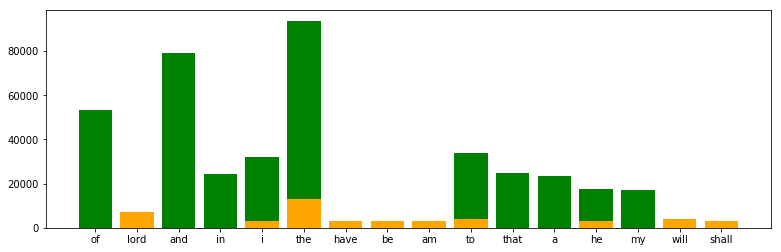

In [8]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

plt.bar(bigramfiletwo.bigramone,bigramfiletwo.frequency,label="bigramone",color="orange")
plt.bar(wordfile.word,wordfile.frequency,label="word",color="green")
plt.bar(bigramfiletwo.bigramtwo,bigramfiletwo.frequency,label="bigramtwo",color="orange")
#green represents monogram
#orange represnts words in bigram


Show the relationship between frequency of monogram to frequency of each word in a trigram

<BarContainer object of 10 artists>

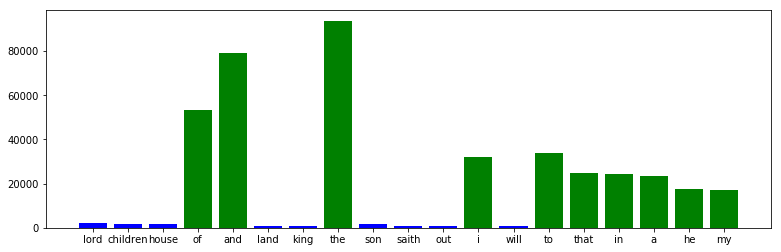

In [11]:
plt.bar(trigramfile.trigramone,trigramfile.frequency,label="trigramone",color="blue")
plt.bar(trigramfile.trigramtwo,trigramfile.frequency,label="trigramtwo",color="blue")
plt.bar(trigramfile.trigramthree,trigramfile.frequency,label="trigramthree",color="blue")
plt.bar(wordfile.word,wordfile.frequency,label="word",color="green")
#green represents monogram
#blue represnts words in bigram
#it is observed that as the number of n increases in the n-gram,
#m its frequency relative to the monogram is very less.

## For greater than a score of 3 
###  Create a TD - IDF implementation and 
### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books



In [ ]:
#named books as 01.txt,02.txt.. so on
#was'nt able to get the exact result , but got the top 20 highest frequency in each book.
# used https://github.com/Jasonnor/tf-idf-python/blob/master/src/tf_idf.py as reference code

In [2]:
import re

import os
from math import log
from operator import itemgetter


class tf_idf:
   
    global list_words
    list_words=[]
 
    def __init__(self):
        self.files = {}
        self.corpus = {}
        self.stop_words = set(())
        content = open('stopwords.txt', 'rb').read().decode('utf-8')
        for line in content.splitlines():
            self.stop_words.add(line)
            
    def add_file(self, file_name):
        # Load data and cut
        content = open(file_name, 'rb').read() if file_name[0] == '/' or file_name[0] == 'C' else open('./data/' + file_name, 'rb').read()
        words = re.findall('[a-z]+', content.lower())
         # Build dictionary
        dictionary = {}
        for w in words:
            if len(w.strip()) < 2 or w.lower() in self.stop_words:
                continue
            dictionary[w] = dictionary.get(w, 0.0) + 1.0
            self.corpus[w] = self.corpus.get(w, 0.0) + 1.0

        # Get term frequency
        total = sum(dictionary.values())
        for k in dictionary:
            dictionary[k] /= total

        # Add tf to the corpus
        self.files[file_name] = dictionary
        
    def get_tf_idf(self, file_name, top_k):
        # Get inverse document frequency
        tf_idf_of_file = {}
        for w in self.corpus.keys():
            w_in_f = 1.0
            for f in self.files:
                if w in self.files[f]:
                    w_in_f += 1.0
            # Get tf-idf
            if w in self.files[file_name]:
                tf_idf_of_file[w] = log(len(self.files) / w_in_f) * self.files[file_name][w]
               
                
        # Top-K result of tf-idf
        tags = sorted(tf_idf_of_file.items(), key=itemgetter(1), reverse=True)
       
        return tags[:top_k]

       
if __name__ == "__main__":
    table = tf_idf()
    folder_name = 'Books'
    folder = os.path.join('./data/' ,folder_name)
    path, dirs, files = next(os.walk("./data/Books"))
    num_of_files = len(files)
    
    for x in range(1, num_of_files):
        file_name = folder_name + '/' + str(x).zfill(2) + '.txt'
        table.add_file(file_name)

    top_k = 20
    for x in range(1, num_of_files):
        target_file = folder_name + '/' + str(x).zfill(2) + '.txt'
        my_data=[]
        
        print('Top ' + str(top_k) + ' of tf-idf in ' + target_file + ' : ')
        print(table.get_tf_idf(target_file, top_k))
        print("\n")


Top 20 of tf-idf in Books/01.txt : 
[('simon', 0.00027027233243064595), ('rucastle', 0.0002567587158091136), ('mccarthy', 0.0002500019074983475), ('coronet', 0.00018919063270145215), ('goose', 0.000182433824390686), ('clair', 0.000182433824390686), ('hosmer', 0.0001554065911476214), ('turner', 0.00014864978283685526), ('stepfather', 0.0001418929745260891), ('roylott', 0.0001418929745260891), ('windibank', 0.00013513616621532297), ('neville', 0.0001283793579045568), ('stoner', 0.0001283793579045568), ('hatherley', 0.00012162254959379067), ('geese', 0.00011486574128302451), ('irene', 0.00011486574128302451), ('boscombe', 0.00010810893297225837), ('openshaw', 0.00010810893297225837), ('adler', 0.00010810893297225837), ('toller', 0.00010135212466149222)]


Top 20 of tf-idf in Books/02.txt : 
[('drebber', 0.0009515771045285108), ('ferrier', 0.0009362290867135349), ('stangerson', 0.0007213568373038711), ('gregson', 0.0006906608016739191), ('jefferson', 0.0005678766591541113), ('footnote', 0.

#### Reference:
[1] https://github.com/Jasonnor/tf-idf-python/blob/master/src/tf_idf.py